In [418]:
#Loading Dataset

import pandas as pd

df1 = pd.read_csv('https://raw.githubusercontent.com/baljinderxd/ML_Assignments/master/Datasets/Country-data.csv')

df1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [419]:
df2 = pd.read_csv('https://raw.githubusercontent.com/baljinderxd/ML_Assignments/master/Datasets/creditCard.csv')

df2

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [420]:
#Preprocessing/Cleaning of Data

#Changing percentage coulmns to actual values in dataset df1
df1['exports'] = (df1['gdpp'] * df1['exports']) / 100
df1['health'] = (df1['gdpp'] * df1['health']) / 100
df1['imports'] = (df1['gdpp'] * df1['imports']) / 100

df1 = df1.drop(columns=['country'])

df1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970
163,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500
164,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310
165,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310


In [421]:
df2 = df2.drop(df2.columns[[0,1,2,3,4,5,6,7,8,10,11,12,16,19,21,22]],axis=1)

df2

,Months_on_book,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,39,12691.0,777,11914.0,1144,42,0.061
1,44,8256.0,864,7392.0,1291,33,0.105
2,36,3418.0,0,3418.0,1887,20,0.000
3,34,3313.0,2517,796.0,1171,20,0.760
4,21,4716.0,0,4716.0,816,28,0.000
...,...,...,...,...,...,...,...
10122,40,4003.0,1851,2152.0,15476,117,0.462
10123,25,4277.0,2186,2091.0,8764,69,0.511
10124,36,5409.0,0,5409.0,10291,60,0.000
10125,36,5281.0,0,5281.0,8395,62,0.000


In [422]:
#Visualization

df1.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


In [423]:
df2.corr()

,Months_on_book,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
Months_on_book,1.000000,0.007507,0.008623,0.006732,-0.038591,-0.049819,-0.007541
Credit_Limit,0.007507,1.000000,0.042493,0.995981,0.171730,0.075927,-0.482965
Total_Revolving_Bal,0.008623,0.042493,1.000000,-0.047167,0.064370,0.056060,0.624022
Avg_Open_To_Buy,0.006732,0.995981,-0.047167,1.000000,0.165923,0.070885,-0.538808
Total_Trans_Amt,-0.038591,0.171730,0.064370,0.165923,1.000000,0.807192,-0.083034
Total_Trans_Ct,-0.049819,0.075927,0.056060,0.070885,0.807192,1.000000,0.002838
Avg_Utilization_Ratio,-0.007541,-0.482965,0.624022,-0.538808,-0.083034,0.002838,1.000000


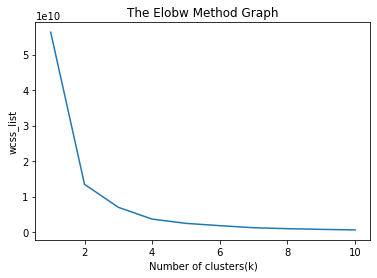

In [424]:
#Algorithm Implementation

#Finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
import numpy as nm    
import matplotlib.pyplot as mtp    

wcss_list_1= []  #Initializing the list for the values of WCSS  

new_data_1 = df1.iloc[:,[2,8]].values
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans1 = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans1.fit(new_data_1)  
    wcss_list_1.append(kmeans1.inertia_)  
    
mtp.plot(range(1, 11), wcss_list_1)  
mtp.title('The Elobw Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()

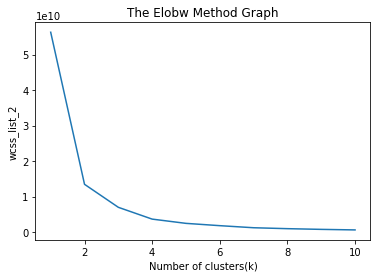

In [425]:
wcss_list_2 = []  #Initializing the list for the values of WCSS  

new_data_2 = df2.iloc[:,[5,4]].values
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans2 = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans2.fit(new_data_2)  
    wcss_list_2.append(kmeans2.inertia_)  

mtp.plot(range(1, 11), wcss_list_1)  
mtp.title('The Elobw Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list_2')  
mtp.show()

In [426]:
#Training the K-means model on a dataset  
kmeans1 = KMeans(n_clusters=3, init='k-means++', random_state= 42)  
y_predict1 = kmeans1.fit_predict(new_data_1)  
y_predict1

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [427]:
kmeans2 = KMeans(n_clusters=4, init='k-means++', random_state= 42)  
y_predict2 = kmeans2.fit_predict(new_data_2)  
y_predict2

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

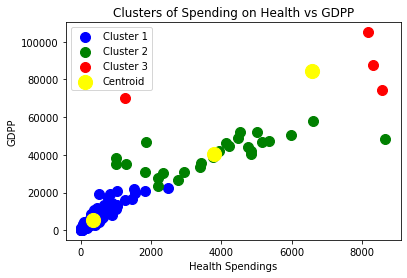

In [428]:
#Final Graph

#Visulaizing the clusters  
mtp.scatter(new_data_1[y_predict1 == 0, 0], new_data_1[y_predict1 == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')   
mtp.scatter(new_data_1[y_predict1 == 1, 0], new_data_1[y_predict1 == 1, 1], s = 100, c = 'green', label = 'Cluster 2') 
mtp.scatter(new_data_1[y_predict1 == 2, 0], new_data_1[y_predict1 == 2, 1], s = 100, c = 'red', label = 'Cluster 3')

mtp.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroid')   
mtp.title('Clusters of Spending on Health vs GDPP')  
mtp.xlabel('Health Spendings')  
mtp.ylabel('GDPP')  
mtp.legend()  
mtp.show() 

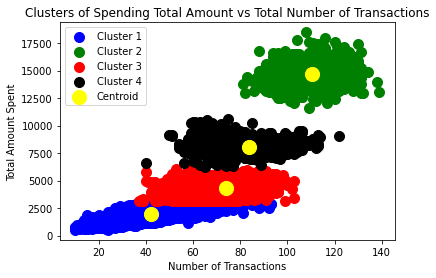

In [429]:
mtp.scatter(new_data_2[y_predict2 == 0, 0], new_data_2[y_predict2 == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') 
mtp.scatter(new_data_2[y_predict2 == 1, 0], new_data_2[y_predict2 == 1, 1], s = 100, c = 'green', label = 'Cluster 2') 
mtp.scatter(new_data_2[y_predict2 == 2, 0], new_data_2[y_predict2 == 2, 1], s = 100, c = 'red', label = 'Cluster 3') 
mtp.scatter(new_data_2[y_predict2 == 3, 0], new_data_2[y_predict2 == 3, 1], s = 100, c = 'black', label = 'Cluster 4')

mtp.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroid')   
mtp.title('Clusters of Spending Total Amount vs Total Number of Transactions')  
mtp.xlabel('Number of Transactions')  
mtp.ylabel('Total Amount Spent')  
mtp.legend()  
mtp.show() 